In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df=pd.read_csv("D:\\data\\bank.csv",sep=';')

In [6]:
cat_col=df.columns[df.dtypes=="O"]
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in cat_col:
    df[i]=l.fit_transform(df[i]) 
  # data['job']=fit_transfrom(df["job"])
   # storing value in same column

In [8]:
X=df.drop('y',axis=1)
Y=df["y"]

# Standardization 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
x_sd=scaler.fit_transform(X)

In [11]:
x_sd

array([[-1.05626965,  1.71680374, -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-0.77258281,  0.79524562, -0.24642938, ...,  2.98904408,
         2.04173372, -2.57996071],
       [-0.58345826, -0.12631251,  1.42139579, ...,  2.89914302,
         0.27012381, -2.57996071],
       ...,
       [ 1.49691189,  1.4096177 , -0.24642938, ..., -0.4072183 ,
        -0.32041282,  0.44441328],
       [-1.24539421, -1.04787063, -0.24642938, ...,  1.71045119,
         1.45119709, -1.57183605],
       [ 0.26760226, -0.74068459,  1.42139579, ...,  2.09003345,
         3.81334363, -1.57183605]])

In [12]:
df1=pd.DataFrame(x_sd,columns=X.columns)

In [13]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.056270,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-0.711861,-0.576829,-0.407218,-0.320413,0.444413
1,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-0.723642,-0.596026,0.819288,-0.169194,-0.576829,2.989044,2.041734,-2.579961
2,-0.583458,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.303898,-0.576829,2.899143,0.270124,-2.579961
3,-1.056270,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,1.495133,-1.566105,0.153161,-0.250017,0.387967,-0.407218,-0.320413,0.444413
4,1.686036,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,1.495133,-1.323585,0.819288,-0.146102,-0.576829,-0.407218,-0.320413,0.444413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,-0.583410,0.875617,-0.424756,-0.723642,1.707910,-0.179903,0.250315,0.709566,-0.407218,-0.320413,0.444413
4517,1.496912,0.488060,-0.246429,1.026680,7.647669,-1.573671,0.875617,2.354292,1.495133,-0.838546,0.819288,-0.427057,-0.576829,-0.407218,-0.320413,0.444413
4518,1.496912,1.409618,-0.246429,-0.309038,-0.130759,-0.374724,-1.142051,-0.424756,-0.723642,0.374052,-1.512157,-0.434754,2.639160,-0.407218,-0.320413,0.444413
4519,-1.245394,-1.047871,-0.246429,-0.309038,-0.130759,-0.094925,-1.142051,-0.424756,-0.723642,-1.202326,-0.846030,-0.519426,0.387967,1.710451,1.451197,-1.571836


In [14]:
from sklearn.model_selection import train_test_split
x_train_sd,x_test_sd,y_train_sd,y_test_sd=train_test_split(x_sd,Y,train_size=0.75,random_state=12345)

# Decission Tree

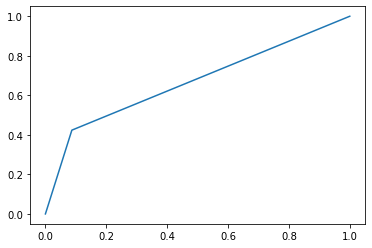

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier() # bydefault criterion='gini'
tree_model.fit(X=x_train_sd,y=y_train_sd)
y_dt_pred=tree_model.predict(x_test_sd)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test_sd,y_dt_pred).ravel()


dt_acc=accuracy_score(y_test_sd,y_dt_pred)
dt_pr=precision_score(y_test_sd,y_dt_pred)
dt_recall=recall_score(y_test_sd,y_dt_pred)
dt_f1_score=f1_score(y_test_sd,y_dt_pred)

dict1={"dt_accuracy":dt_acc,
      "dt_precission":(dt_pr),
      "dt_recall":(dt_recall),
      "dt_f1_score":(dt_f1_score)}
pd.DataFrame(dict1,index=[1])
from sklearn.metrics import roc_curve
y_dt_pred_prob=tree_model.predict_proba(x_test_sd)[:,1]
fpr,tpr,threshold=roc_curve(y_test_sd,y_dt_pred_prob)
plt.plot(fpr,tpr)


In [30]:
dict1

{'dt_accuracy': 0.8620689655172413,
 'dt_precission': 0.36231884057971014,
 'dt_recall': 0.423728813559322,
 'dt_f1_score': 0.39062499999999994}

# Navies Bayes

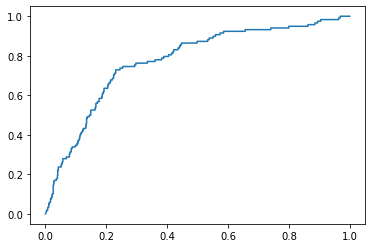

In [31]:
from sklearn.naive_bayes import GaussianNB
navi_model=GaussianNB()
navi_model.fit(X=x_train_sd,y=y_train_sd)
y_nb_pred=navi_model.predict(x_test_sd)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test_sd,y_nb_pred).ravel()


navi_acc=accuracy_score(y_test_sd,y_nb_pred)
navi_pr=precision_score(y_test_sd,y_nb_pred)
navi_recall=recall_score(y_test_sd,y_nb_pred)
navi_f1_score=f1_score(y_test_sd,y_nb_pred)

dict1={"NB_accuracy":navi_acc,
      "NB_precission":(navi_pr),
      "NB_recall":(navi_recall),
      "NB_f1_score":(navi_f1_score)}
pd.DataFrame(dict1,index=[1])
from sklearn.metrics import roc_curve
y_nb_pred_prob=navi_model.predict_proba(x_test_sd)[:,1]
fpr,tpr,threshold=roc_curve(y_test_sd,y_nb_pred_prob)
plt.plot(fpr,tpr)


In [32]:
dict1

{'NB_accuracy': 0.8222811671087533,
 'NB_precission': 0.27807486631016043,
 'NB_recall': 0.4406779661016949,
 'NB_f1_score': 0.3409836065573771}

# Logistic regression

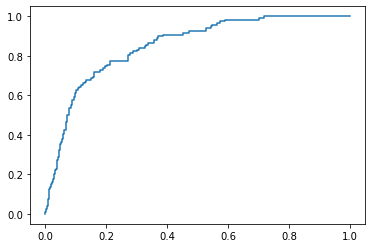

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X=x_train_sd,y=y_train_sd)
y_lr_pred=lr.predict(x_test_sd)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test_sd,y_lr_pred).ravel()


lr_acc=accuracy_score(y_test_sd,y_lr_pred)
lr_pr=precision_score(y_test_sd,y_lr_pred)
lr_recall=recall_score(y_test_sd,y_lr_pred)
lr_f1_score=f1_score(y_test_sd,y_lr_pred)

dict1={"lr_accuracy":lr_acc,
      "lr_precission":(lr_pr),
      "lr_recall":(lr_recall),
      "lr_f1_score":(lr_f1_score)}
pd.DataFrame(dict1,index=[1])
from sklearn.metrics import roc_curve
y_lr_pred_prob=lr.predict_proba(x_test_sd)[:,1]
fpr,tpr,threshold=roc_curve(y_test_sd,y_lr_pred_prob)
plt.plot(fpr,tpr)


In [34]:
dict1

{'lr_accuracy': 0.8894783377541998,
 'lr_precission': 0.4406779661016949,
 'lr_recall': 0.22033898305084745,
 'lr_f1_score': 0.2937853107344633}

# KNN

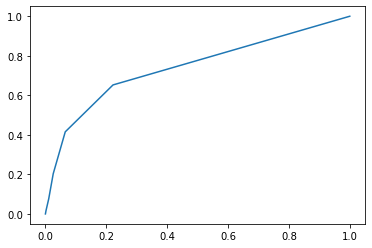

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X=x_train_sd,y=y_train_sd)
y_knn_pred=knn.predict(x_test_sd)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test_sd,y_knn_pred).ravel()


knn_acc=accuracy_score(y_test_sd,y_knn_pred)
knn_pr=precision_score(y_test_sd,y_knn_pred)
knn_recall=recall_score(y_test_sd,y_knn_pred)
knn_f1_score=f1_score(y_test_sd,y_knn_pred)

dict1={"knn_accuracy":knn_acc,
      "knn_precission":(knn_pr),
      "knn_recall":(knn_recall),
      "knn_f1_score":(knn_f1_score)}
pd.DataFrame(dict1,index=[1])
from sklearn.metrics import roc_curve
y_knn_pred_prob=knn.predict_proba(x_test_sd)[:,1]
fpr,tpr,threshold=roc_curve(y_test_sd,y_knn_pred_prob)
plt.plot(fpr,tpr)

# Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X=x_train_sd,y=y_train_sd)
y_rf_pred=rf.predict(x_test_sd)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp=confusion_matrix(y_test_sd,y_rf_pred).ravel()


rf_acc=accuracy_score(y_test_sd,y_rf_pred)
rf_pr=precision_score(y_test_sd,y_rf_pred)
rf_recall=recall_score(y_test_sd,y_rf_pred)
rf_f1_score=f1_score(y_test_sd,y_rf_pred)

dict1={"rf_accuracy":rf_acc,
      "rf_precission":(rf_pr),
      "rf_recall":(rf_recall),
      "rf_f1_score":(rf_f1_score)}
pd.DataFrame(dict1,index=[1])
from sklearn.metrics import roc_curve
y_rf_pred_prob=rf.predict_proba(x_test_sd)[:,1]
fpr,tpr,threshold=roc_curve(y_test_sd,y_rf_pred_prob)
plt.plot(fpr,tpr)    

NameError: name 'x_train_sd' is not defined

In [2]:
dt_list=[dt_acc,dt_pr,dt_recall,dt_f1_score]
nb_list=[navi_acc,navi_pr,navi_recall,navi_f1_score]
lr_list=[lr_acc,lr_pr,lr_recall,lr_f1_score]
knn_list=[knn_acc,knn_pr,knn_recall,knn_f1_score]
rf_list=[rf_acc,rf_pr,rf_recall,rf_f1_score]
pd.DataFrame(zip(dt_list,nb_list,lr_list,knn_list,rf_list),
             columns=['Decision_Tree','Naive_Bayes','LogisticsRegression',"KNN","RF"],
             index=['Accuracy','Precison','Recall','F1score'])

NameError: name 'dt_acc' is not defined

# Hyperparameter Tunning

In [19]:

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
grid_tree=DecisionTreeClassifier() # shift + tab see criterion or spliter
grid_tree

DecisionTreeClassifier()

In [20]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [21]:
grid_para={"criterion":["gini", "entropy"],  # which is best bw gini or entropy 
          "max_depth":[3,4,5,6,7,8]}          # which is best depth 
# grid search create best model 

In [27]:
grid_model=GridSearchCV(grid_tree, # grid_tree=DecisionTreeClassifier()
                        cv=5,        # cv=crossvalidation 
                        param_grid=grid_para, # grid parameter to find out which is best 
                        scoring="accuracy", # scoring on their accuracy 
                       verbose=True) # it will give adition information 

In [28]:
grid_model.fit(x_train_sd,y_train_sd)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8]},
             scoring='accuracy', verbose=True)

In [29]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [30]:
grid_model.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [31]:
grid_model.best_score_

0.8896755162241888

In [37]:
cross_val_score(grid_model.best_estimator_,
               x_train_sd,y_train_sd,
               scoring='accuracy') 
# cv=5 
# it will give for all accuracy 

array([0.88495575, 0.87463127, 0.88495575, 0.90707965, 0.88938053])

In [38]:
cross_val_score(grid_model.best_estimator_,
               x_train_sd,y_train_sd,
               scoring='accuracy').mean()

0.8882005899705016

# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_grid=KNeighborsClassifier()
knn_grid.get_params()
knn_grid_para={"n_neighbors":[5,6,7,10],
              "leaf_size":[20,30,40,50],
              "algorithm" :['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid_model=GridSearchCV(knn_grid, 
                        cv=5,       
                        param_grid=knn_grid_para, 
                        scoring="accuracy", 
                       verbose=True)
knn_grid_model.fit(x_train_sd,y_train_sd)
print(knn_grid_model.best_estimator_)
print(knn_grid_model.best_params_)
print(knn_grid_model.best_score_)

cross_val_score(knn_grid_model.best_estimator_,
               x_train_sd,y_train_sd,
               scoring='accuracy') 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
KNeighborsClassifier(leaf_size=20)
{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5}
0.889085545722714


array([0.88053097, 0.87610619, 0.89675516, 0.89675516, 0.89528024])

# navibayes 
# logistic regression

# loan prediction 